### Project 3: Calculus and Filtering with Op Amps

    
  This project comes in 2 parts: Part A is to build a circuit that produces an output voltage waveform that is proportional to the time derivative of the input waveform. Part B is to build a circuit that filters out frequencies above a certain cutoff frequency, but leaves lower frequencies unaffected.
For this project, we will use the oscilloscope to make our observations. 
As an illustration of what to expect:
When the frequency is set at 100 Hz, the voltage obtained is around 0.013 mV.
However, when the voltage goes above 1 kHz, it significantly decreases. 
As an example, when the frequency is at 3.2 kHz, the voltage is 0.0095 mV 

### Part A

##### Circuit Schematic

Let's start with the differentiator. The name "operational amplifier" comes from the historical use of amplifiers as elements of analog computers in which they played the role of mathematical operators. For example as shown in the Figure below you can add multiple voltages using a "summing amplifier"




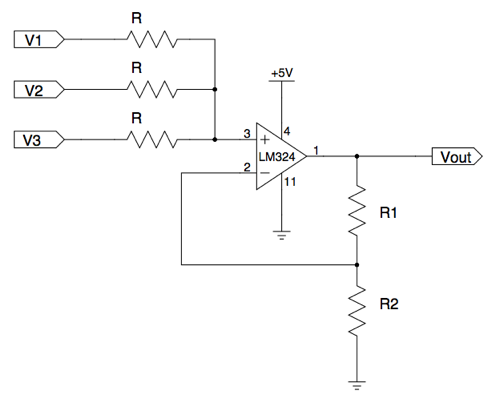

In [2]:
from IPython.display import Image
Image(filename='sum.png')

We will build the following circuit in order to study the behavior of the voltage waveform with respect to time, which should more or less look like the graph below:


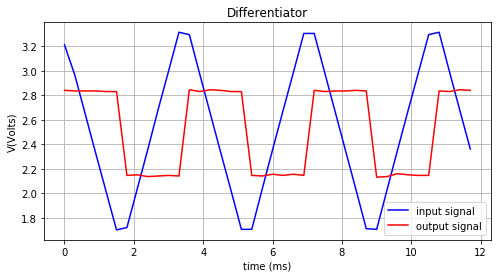

In [3]:
from IPython.display import Image
Image(filename='downloadz.png')

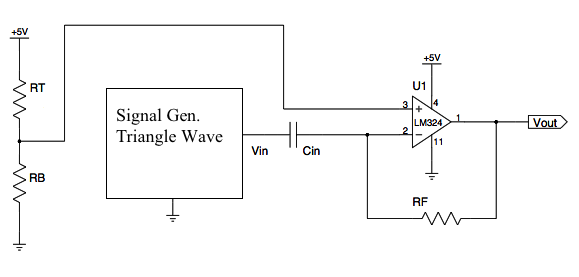

In [4]:
Image(filename='diff.png')

##### Circuit Function 
As mentioned above, such a circuit produces an output voltage waveform that is proportional to the time derivative of the input waveform.
Around Rt and Rb, we have a voltage division situation, which means we can apply its laws. As we want our voltage at the non-inverting terminal to be small, we picked Rt and Rb, which are in a voltage division situation, to be respectively 1.6 kohms and 820. Therefore, the voltage at the non-inverting terminal will be:

$V = Vsource x \frac{Rb}{(Rb+Rt)}$
 
 => Vni = 1.69 V   (peak-to-peak)
Knowing Vni (non_inverting), we also know Vi(inverting). How? 
Let's recall the two fundamental rules of an operational amplifier

1. No current enters or leaves the inputs.
2. The output voltage adjusts to make $V_+$ and $V_-$ equal.

That being said, we know the voltage peak to peak delivered by the Signal Generator.

After building the circuit, here's what the oscilloscope displays:

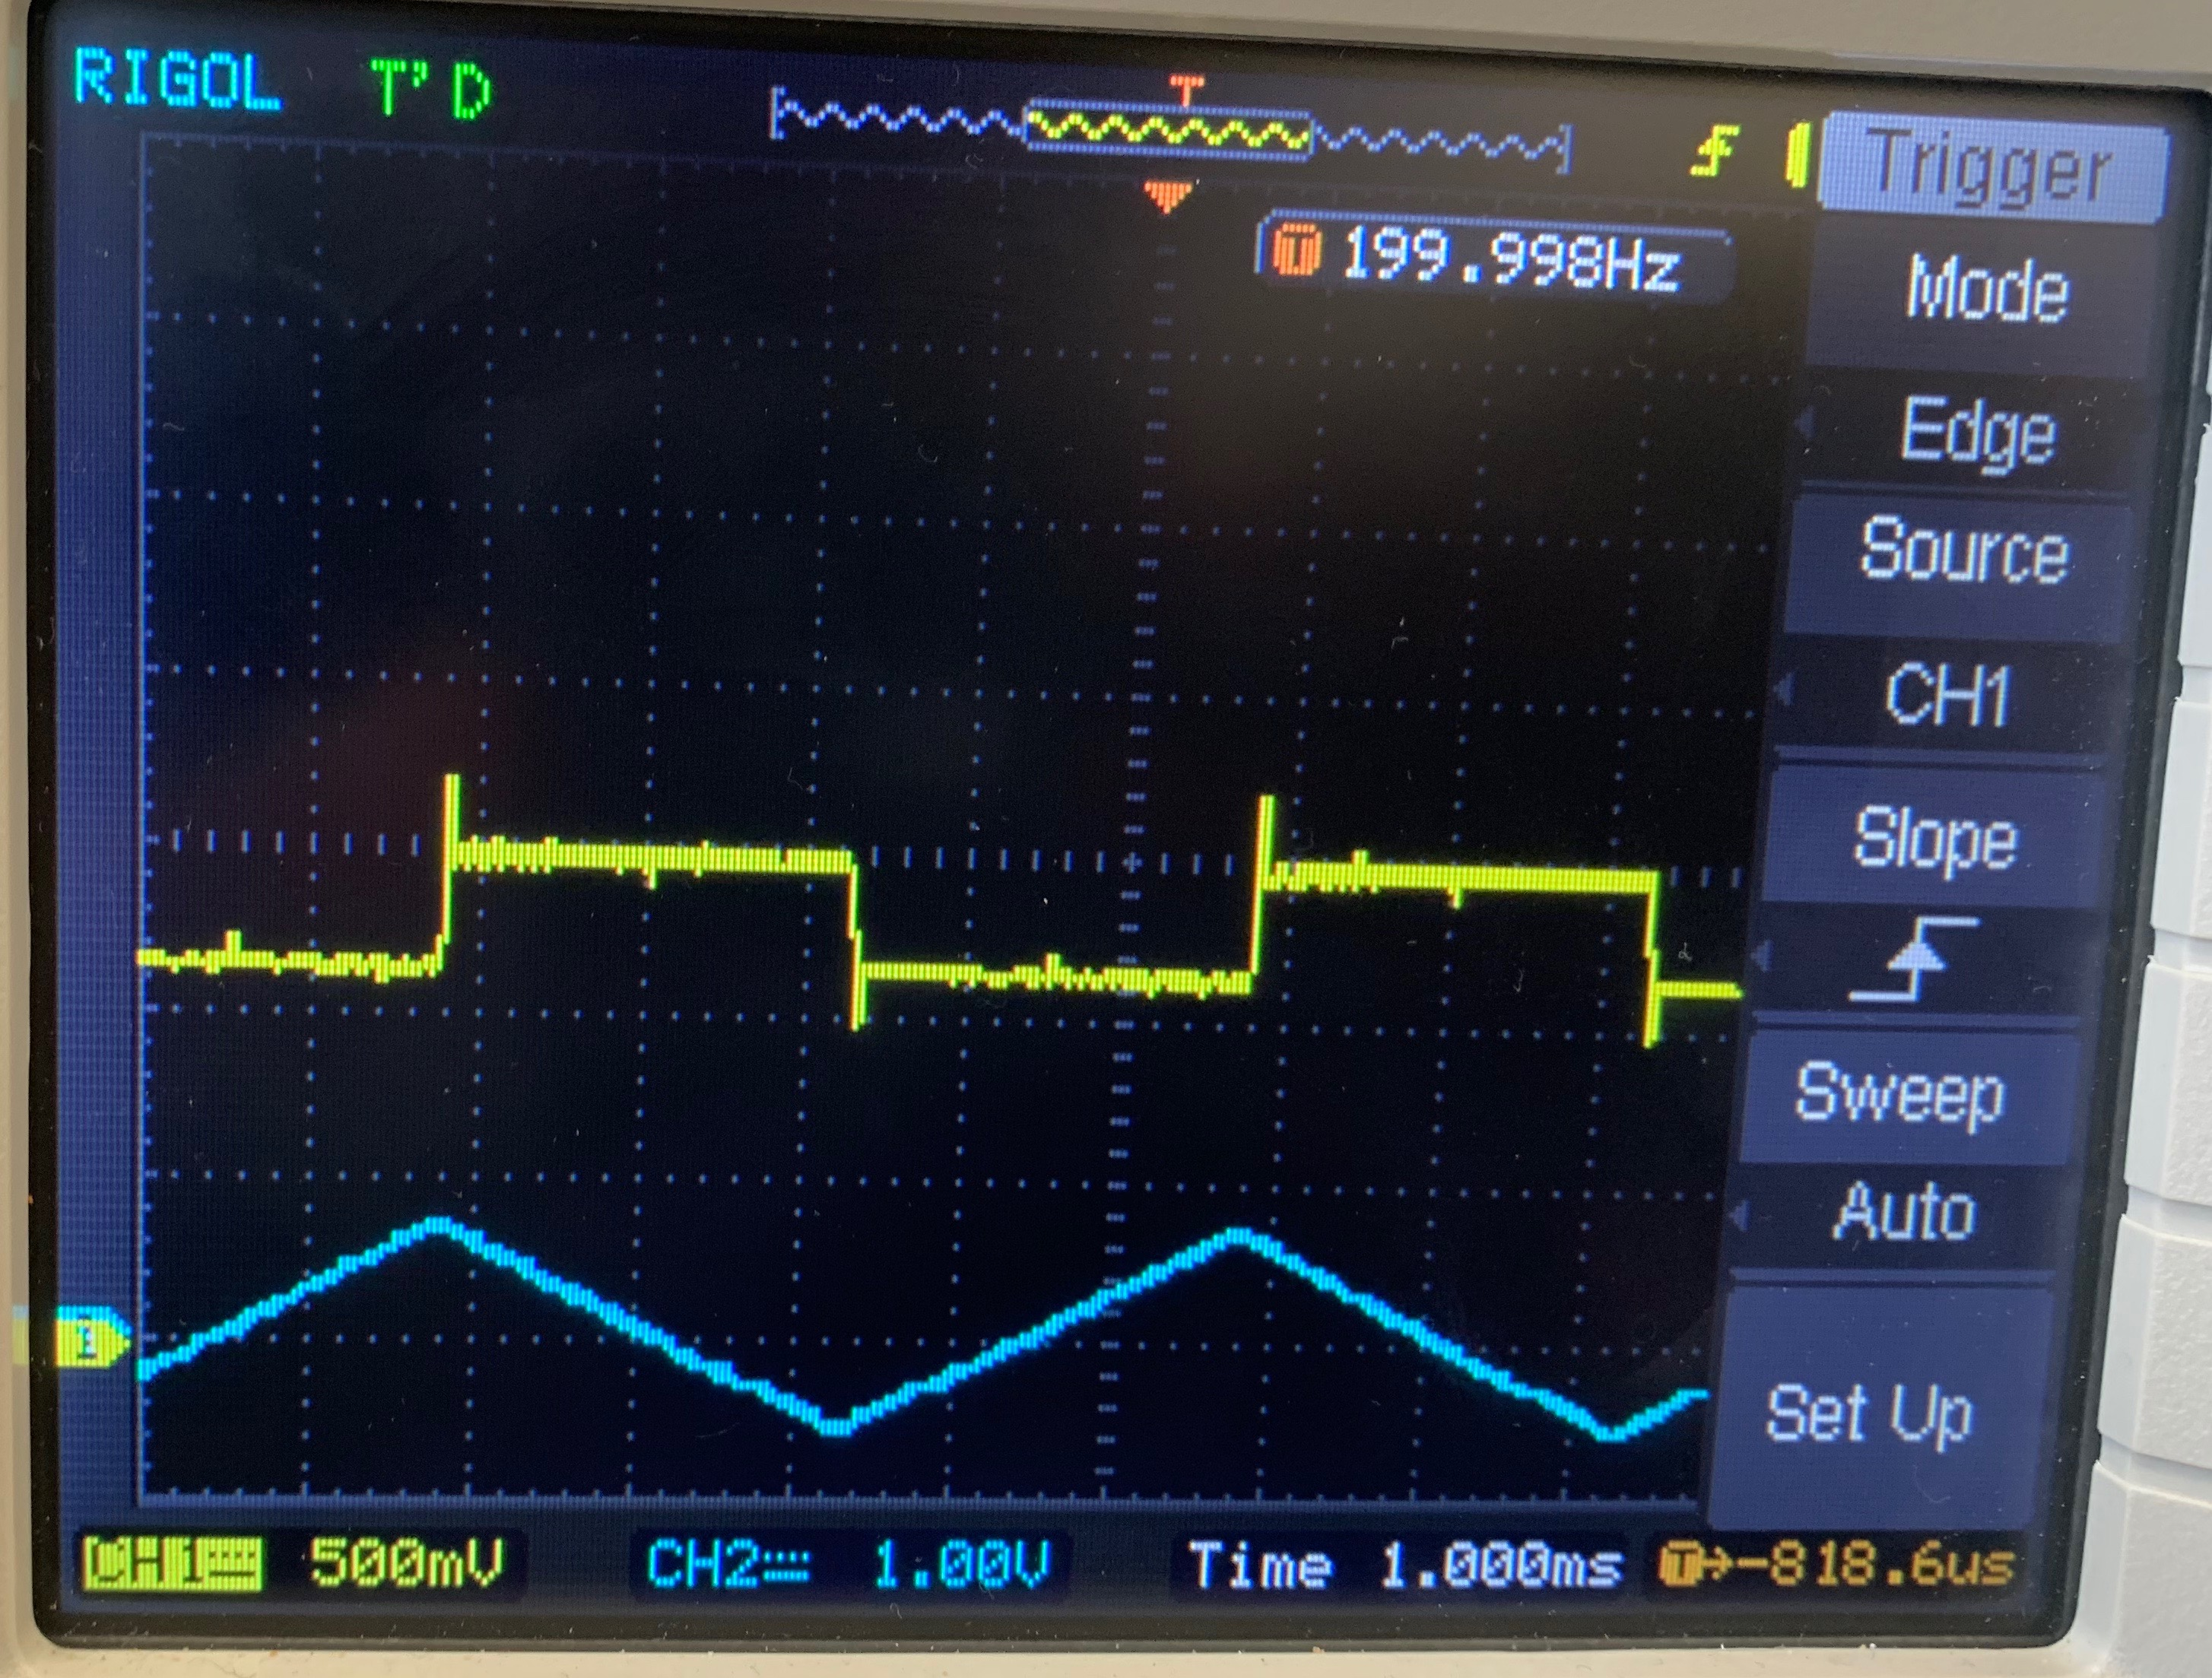

In [5]:
from IPython.display import Image
Image(filename='IMG21.jpg')

##### Results:

As observed on the graph above, the behavior obtained is just as we expected it to be. Let's first put a small legend:
* The yellow square wave is the output voltage at the output pin of the operational amplifier. 
* The blue triangle wave is generated by the Signal generator.   
Any time the triangle wave reaches its summit(at 1.69V), the square wave is High and keeps this state as long as it is not fully discharged (when it reaches the base of the triangle wave) and vice versa. 

e.g: * from 1.8 ms to 4.2 ms the square wave is High
     * from 4.2 ms to 6.2 ms the square wave is Low

The variation of the voltage with respect to time of the two waves really presents an output voltage waveform that is proportional to the time derivative of the input waveform. This validates our expectation for Part A.

### Part B: Electronic Filters

In this part, we will build a Low Pass Filter.
##### Circuit schematic & Background

Definition: A Low Pass Filter is a circuit that can be designed to modify, reshape or reject all unwanted high frequencies of an electrical signal and accept or pass only those signals wanted by the circuits designer. (ElectronicsTutorials)
A Low pass Filter allows setting a limit, a cut-off frequency. Once we go above the limit, the output voltage decreases significantly. 

An example is shown below:


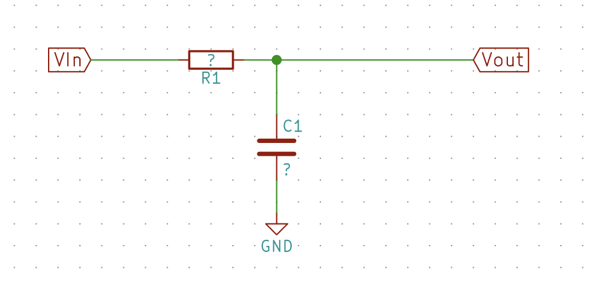

In [6]:
Image(filename='RC.png')


There also exists a High pass which is built just as the Low Pass but with a slight difference, which is just the Resistor and the capacitor swapped.


##### Circuit function
 How can we apply this in the lab? Suppose we need a circuit the produces a gain of 2 for low frequencies, but rolls off at high frequency? Perhaps we want frequencies above about 1kHz (the "cutoff" frequency) to be "filtered" out. One way would be to put a simple low pass filter on the "front end" of a "gain of 2" non-inverting amplifier.

We can't use the Arduino this time because we need to apply input voltages and measure output over a wide range of frequencies to see the effect. Sadly, the Arduino is not up to this task. 


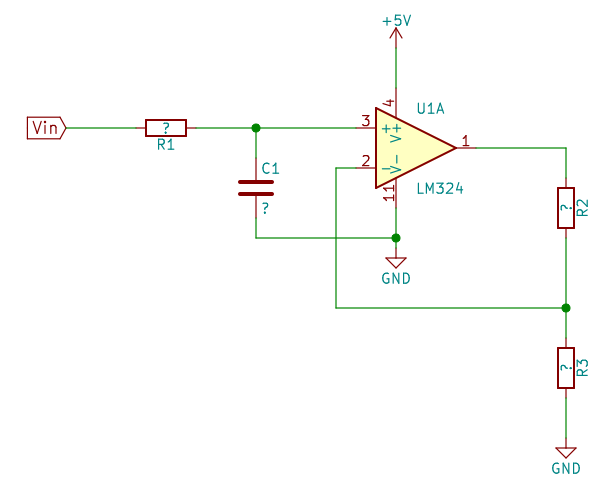

In [7]:
Image(filename='opamp.png')

#### $R_1$ = 1 Kohms

As we set Vin to 1V, this only produces a current of 1mA.  

$R_2$ = 800 Ohms

$R_3$ = 1.6 Kohms

$R_2$ and $R_3$ are solved the same way as in project 2.

$C_1$ = $\frac{1}{2\pi R_1f} = 0.16 \mu F $  

Having $R_1$fixed, we can easily solve for $C_1$ with the formula given above.
##### Results 


The results of this experiment will essentially focus on looking at the oscilloscopes for various frequencies.

We need to prove that once the frequency goes above 1000 Hz, the voltage significantly decreases.

For the figures below, here's the legend (from left to right):

* Signal generator
* Oscillators:

 1. Input signal
 2. Output signal at the capacitor.
 3. Output signal at the amplifier. 

##### Figure #1

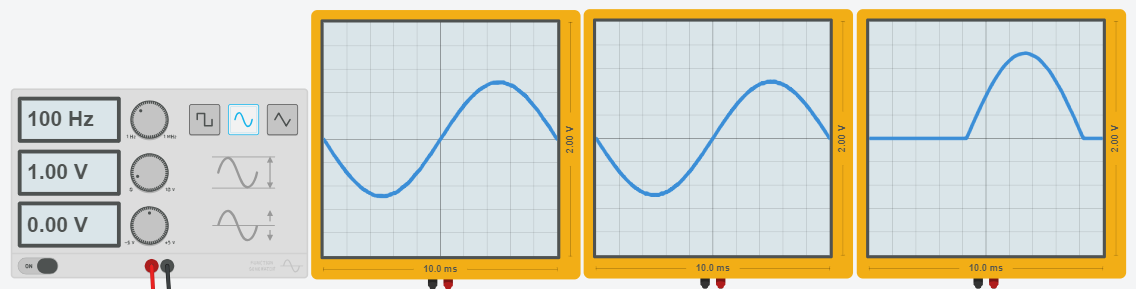

In [10]:
Image(filename='s1.png')

With the frequency at 100 Hz and time division of 10 ms, the voltage on the capacitor is around 2 V peak to peak and 3.9 V at the amplifier's output, which makes it almost 2 times bigger. (Gain = 2) 
##### Figure #2

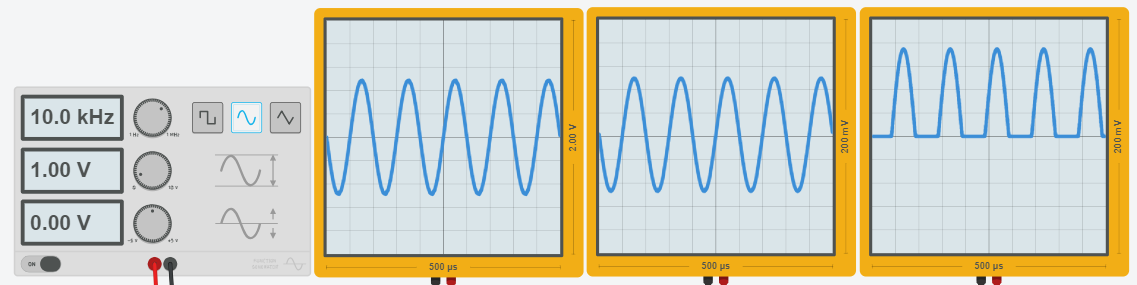

In [10]:
Image(filename='S3.png')

With the frequency at 10 KHz and time division of 500$\mu s$, the voltage on the capacitor is around 100 mV peak to peak. We can see how important is the change in Voltage because the frequency is way above our cut-off frequency.
##### Figure #3

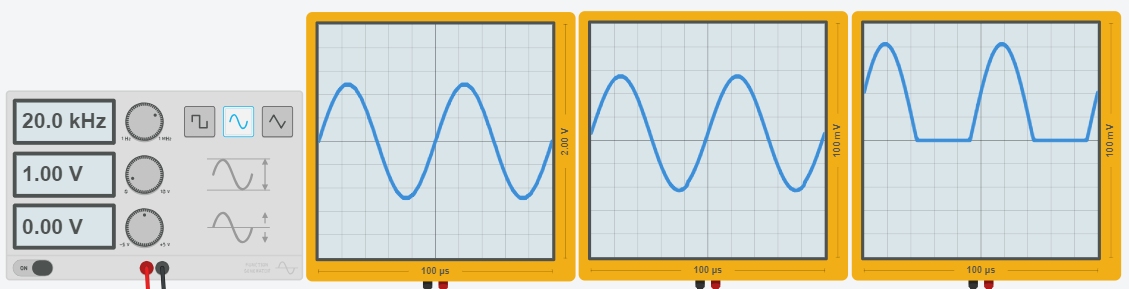

In [11]:
Image(filename='S2.png')


When the frequency is set at 20 KHz, the voltage is, as expected, way below the input voltage.

In [18]:
%matplotlib inline
import matplotlib.pyplot as pl
import matplotlib as mp
import numpy as np

N=10000 # how many random numbers to generate?
Tau = 10.0
#r = np.random.rand(N)
#t = -Tau*np.log(1.0-r)

#pl.hist(t, bins=np.linspace(0,50,11))
#pl.title("Exponentially distributed 't's")
#pl.xlabel("t (min)")
#pl.ylabel("Number (out of %d)" % N)

(array([46., 17., 19.,  8.,  3.,  4.,  2.,  0.,  0.,  1.]),
 array([ 0.11912994,  5.39362689, 10.66812384, 15.94262079, 21.21711774,
        26.49161469, 31.76611164, 37.04060859, 42.31510554, 47.58960249,
        52.86409944]),
 <a list of 10 Patch objects>)

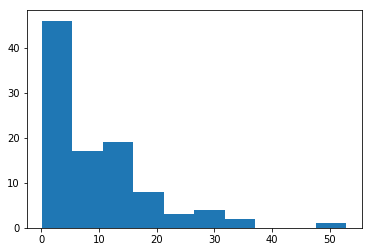

In [22]:
t = -Tau*np.log(1.0-np.random.rand(100))  # get 100 intervals between defects
pl.hist(t)

In [23]:
# What is the total time for these 100 intervals?

print("Total time:", t.sum())

Total time: 947.825668910938


In [58]:
# What is the averate time between defects for these samples?

print("Average time:", t.mean())

Average time: 9.26676220234195


#### Problem A

Minimum time between three successive defects: 0.7697522708047246
times less than 10: [2.85663455 2.73629082 9.57833063 5.74603363 3.29060179 6.53227916
 8.78006348 0.76975227 7.56019914 2.14540659 1.71524562 7.58253374
 6.44324258 6.94689796 5.49683048 6.05719983 5.46252017 1.52238536
 8.22016852 7.76539656 5.6553464  6.31072693 5.61267758 7.28805237
 5.85138    7.57543723]
Number of times 3 defects happened in less than 10 minutes: 26


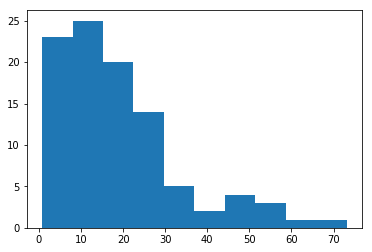

In [24]:
# What is the time between four successive defects? Use the "slice" concept

delta2 = t[:-2] + t[1:-1]
pl.hist(delta2)
print("Minimum time between three successive defects:", min(delta2))

ThreeInLessThan10 = delta2<10
print("times less than 10:", delta2[np.nonzero(ThreeInLessThan10)])
print("Number of times 3 defects happened in less than 10 minutes:", len(delta2[np.nonzero(ThreeInLessThan10)]))

#### Problem B


#####  Let's simulate for 5 hours with the same initial value of tau.

In [37]:



finalTime = 60*5            # run for one hour
processTime = 10.0        # how long does it take to process an 
currTime = 0.0            # what time is it now?
nextTime = processTime    # when will the last defect be finished? (it takes 10 minutes to handle a defect)
defectsProcessed = 0      # how many defects have been processed?
defectsOccurred = 0

for delta in t:
    currTime = currTime + delta # when does the next defect appear?

    if currTime > finalTime:
        break # OK, it's the end of the 8 hour shift, break out.

    defectsOccurred += 1  # count the number of defects that have happened.

    if currTime > nextTime:
        nextTime = currTime + processTime # process immediately
    else:
        nextTime = nextTime + processTime # process after this one.
        
    if nextTime<finalTime:
        defectsProcessed += 1
        
print("Defects Occurred:", defectsOccurred)
print("Defects Processed:", defectsProcessed)
print("Backlog: Defects unhandled ->", defectsOccurred-defectsProcessed)


Defects Occurred: 31
Defects Processed: 28
Backlog: Defects unhandled -> 3


##### Let's now simulate for 3 hours with tau/1.1

In [38]:

t = -Tau/1.1*np.log(1.0-np.random.rand(100))  # get 100 intervals between defects


finalTime = 60*3          # run for 3 hours
processTime = 10.0        # how long does it take to process an 
currTime = 0.0            # what time is it now?
nextTime = processTime    # when will the last defect be finished? (it takes 10 minutes to handle a defect)
defectsProcessed = 0      # how many defects have been processed?
defectsOccurred = 0

for delta in t:
    currTime = currTime + delta # when does the next defect appear?

    if currTime > finalTime:
        break # OK, it's the end of the 8 hour shift, break out.

    defectsOccurred += 1  # count the number of defects that have happened.

    if currTime > nextTime:
        nextTime = currTime + processTime # process immediately
    else:
        nextTime = nextTime + processTime # process after this one.
        
    if nextTime<finalTime:
        defectsProcessed += 1
        
print("Defects Occurred:", defectsOccurred)
print("Defects Processed:", defectsProcessed)
print("Backlog: Defects unhandled ->", defectsOccurred-defectsProcessed)


Defects Occurred: 15
Defects Processed: 13
Backlog: Defects unhandled -> 2


### Conclusion

In this experiment, we built a low pass filter, which has the purpose of filtering unwanted frequencies. For our case, our filter impedes frequencies above 1k. 
As observed above, when we set the frequency above 10KHz, the voltage goes below 75 mv, when set at 20 kHz, the voltage division goes even lower, below 40mV. On the other hand, when we set the frequency below 100 Hz, the voltage is around 0.8v. 
The results obtained for the stats exercises:
3 or more defects in less than 10 minutes in an 8 hour shift:

Minimum time between three successive defects: 0.7697522708047246
times less than 10: 
**[2.85663455 2.73629082 9.57833063 5.74603363 3.29060179 6.53227916
 8.78006348 0.76975227 7.56019914 2.14540659 1.71524562 7.58253374
 6.44324258 6.94689796 5.49683048 6.05719983 5.46252017 1.52238536
 8.22016852 7.76539656 5.6553464  6.31072693 5.61267758 7.28805237
 5.85138    7.57543723]**

Number of times 3 defects happened in less than 10 minutes: 26

After 5 hours,

Defects Occurred: 31
Defects Processed: 28
Backlog: Defects unhandled -> 3

3 hours later, with the defect rate  up by 10% 
Defects Occurred: 15
Defects Processed: 13
Backlog: Defects unhandled -> 2